In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import datasets, metrics, model_selection, svm
from scipy import stats 
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing

In [45]:
crime = pd.read_csv('censusCrime.csv')

In [46]:
crime

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [179]:
features = crime.select_dtypes(include='number')
featuresLs = features.drop(['fold'],axis=1)
features = featuresLs.iloc[:,1:]
features

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.22,0.28,0.34,0.48,0.39,0.01,0.28,0.05,0.00,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.53,0.25,0.17,0.10,0.00,0.02,0.37,0.20,0.00,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.25,0.68,0.61,0.79,0.76,0.08,0.32,0.18,0.91,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.45,0.64,0.54,0.59,0.52,0.03,0.38,0.33,0.22,0.19


In [159]:
pca = PCA(n_components=2)
pca.fit(features)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)


[1.08461599 0.7590808 ]
[0.26963588 0.18870773]


In [180]:
Scale_pca = preprocessing.scale(pca.explained_variance_ratio_)

In [181]:
projectAxes = pca.transform(features)


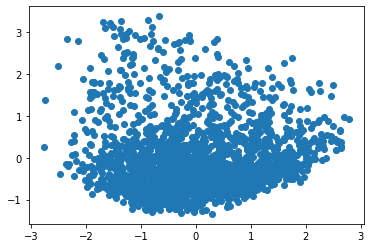

In [182]:
plt.figure(1)
plt.scatter(projectAxes[:,0], projectAxes[:,1])
plt.show()

In [202]:
labels = features.iloc[0]

components = pd.DataFrame(pca.components_)
components

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.022494,0.008579,-0.132060,0.129288,0.059871,-0.065498,-0.046373,-0.046257,-0.046889,-0.032965,...,0.022289,-0.045403,0.034744,-0.018160,-0.020314,-0.009546,-0.018746,0.034236,-0.046578,-0.135258
1,0.046261,0.071946,0.026233,-0.153449,0.161164,0.185103,0.015082,0.046773,0.033005,-0.069034,...,0.241039,-0.121635,-0.053261,-0.036811,-0.057328,0.006997,0.147536,0.118424,0.077672,0.094501


In [203]:
labels

population             0.19
householdsize          0.33
racepctblack           0.02
racePctWhite           0.90
racePctAsian           0.12
                       ... 
LandArea               0.12
PopDens                0.26
PctUsePubTrans         0.20
LemasPctOfficDrugUn    0.32
ViolentCrimesPerPop    0.20
Name: 0, Length: 100, dtype: float64

In [213]:
header_row = labels.iloc[0]
df2 = pd.DataFrame(components.values[1:], columns=header_row)
df2

TypeError: Index(...) must be called with a collection of some kind, 0.19 was passed

In [211]:
comp = components.rename(columns=labels.iloc[0]).loc[1:]
comp

TypeError: Index(...) must be called with a collection of some kind, 0.19 was passed

In [173]:
comp = pd.concat({labels [components]})
comp

TypeError: unhashable type: 'DataFrame'

In [150]:
pca.components_

array([[-0.02249391,  0.00857896, -0.13205977,  0.12928805,  0.05987073,
        -0.06549835, -0.04637252, -0.0462565 , -0.04688859, -0.03296469,
        -0.01794629,  0.1432026 ,  0.18559214,  0.10161807, -0.00489188,
         0.14894013, -0.05896663, -0.17453134,  0.00626342,  0.17710333,
         0.15841427,  0.1366214 ,  0.10502787,  0.04281265,  0.08063254,
         0.11051755, -0.04163888, -0.19117711, -0.15069215, -0.15913583,
         0.14050083, -0.15329655,  0.10891836, -0.02162385,  0.01641875,
        -0.13267951,  0.1335101 , -0.10718528, -0.04284561, -0.10317239,
        -0.1109069 , -0.01495084,  0.1644108 ,  0.1708045 ,  0.17975281,
         0.13573645, -0.01049948,  0.01328012, -0.03290423, -0.15520067,
        -0.00846525, -0.04319473, -0.04971381, -0.04736813, -0.05237116,
        -0.00066157, -0.0034224 , -0.00054462, -0.00311513,  0.02702597,
        -0.05055001, -0.0695548 , -0.0517844 ,  0.0212713 ,  0.03534446,
        -0.05019261,  0.12496795, -0.08896611, -0.0

In [154]:
comp

,state,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,90,91,92,93,94,95,96,97,98,99
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.022289,-0.045403,0.034744,-0.018160,-0.020314,-0.009546,-0.018746,0.034236,-0.046578,-0.135258
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.241039,-0.121635,-0.053261,-0.036811,-0.057328,0.006997,0.147536,0.118424,0.077672,0.094501
